Automat zapisuje miejsce, w którym kończy się dany wzór.

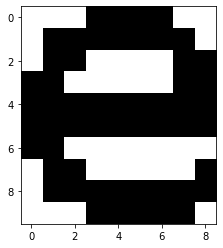

255 255 255  0   0   0   0  255 255 
255  0   0   0   0   0   0   0  255 
255  0   0  255 255 255 255  0   0  
 0   0  255 255 255 255 255  0   0  
 0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0  
 0   0  255 255 255 255 255 255 255 
255  0   0  255 255 255 255 255  0  
255  0   0   0   0   0   0   0   0  
255 255 255  0   0   0   0   0  255 

[(255, 255, 255, 0, 0, 0, 0, 255, 255),
 (255, 0, 0, 0, 0, 0, 0, 0, 255),
 (255, 0, 0, 255, 255, 255, 255, 0, 0),
 (0, 0, 255, 255, 255, 255, 255, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 255, 255, 255, 255, 255, 255, 255),
 (255, 0, 0, 255, 255, 255, 255, 255, 0),
 (255, 0, 0, 0, 0, 0, 0, 0, 0),
 (255, 255, 255, 0, 0, 0, 0, 0, 255)]
{(0, 0, 0, 0, 0, 0, 0, 0, 0): 5,
 (0, 0, 255, 255, 255, 255, 255, 0, 0): 3,
 (0, 0, 255, 255, 255, 255, 255, 255, 255): 6,
 (255, 0, 0, 0, 0, 0, 0, 0, 0): 8,
 (255, 0, 0, 0, 0, 0, 0, 0, 255): 1,
 (255, 0, 0, 255, 255, 255, 255, 0, 0): 2,
 (255, 0, 0, 255, 255

In [486]:
from pprint import pprint
def print_arr(arr):
    for l in arr:
        for c in l:
            if c is None:
                print("{:^4}".format(-1), end="")
            else:
                print("{:^4}".format(c), end="")
        print()
    print()

class Automata:
    empty_str = "$"
    empty_any = -1
    class State:
        def __init__(self, fail_link=None):
            self.transitions = {}
            self.fail_link = fail_link
            self.accepting = False
            self.pattern_number = None

        # def __repr__(self):
        #     res = ""
        #
        #     for k, v in self.transitions.items():
        #         res += "{}: {}\n".format(k, v)
        #
        #     return res

        def __str__(self):
            return str(self.transitions)

    def __init__(self, pattern_list, stop=False):
        self.start = self.State()
        print_arr(pattern_list)
        if type(pattern_list[0]) == list:
            pattern_list = [tuple(v) for v in pattern_list]
            pprint(pattern_list)

        pattern_list_dict = {v : i for i, v in enumerate(pattern_list)}
        pprint(pattern_list_dict)
        self.pattern = [[pattern_list_dict[v] for v in pattern_list]]


        for number, pattern in enumerate(pattern_list):
            state = self.start

            for letter in pattern:
                if letter not in state.transitions:
                    state.transitions[letter] = self.State(fail_link=self.start)
                state = state.transitions[letter]

            state.accepting=True
            state.pattern_number = number

        q = list(self.start.transitions.values())

        while q:
            state = q.pop()

            for letter, next_state in state.transitions.items():
                fail_link = state.fail_link

                while fail_link is not None:
                    if letter in fail_link.transitions:
                        next_state.fail_link = fail_link.transitions[letter]
                        break

                    fail_link = fail_link.fail_link

                q.append(next_state)

        if not stop:
            self.col_automata = Automata(self.pattern, stop = True)

    def run2d(self, text_2d, stop=False):
        max_len = max(len(l) for l in text_2d)
        matched = [None] * len(text_2d)

        print_arr(text_2d)
        # for l in self.pattern:
        #     for c in l:
        #         if c is None:
        #             print("{:^4}".format(-1), end="")
        #         else:
        #             print("{:^4}".format(c), end="")
        #     print()
        for i, col in enumerate(text_2d):
            if len(col) < max_len:
                if type(col) == str:
                    col += self.empty_str*(max_len - len(col))
                elif type(col) == list:
                    col += [self.empty_any]*(max_len - len(col))
            m = self.run(col)

            matched[i] = m
        if not stop:
            print_arr(matched)
            matched = self.col_automata.run2d(list(map(list, zip(*matched))), True)
            matches = []

            for i in range(len(matched)):
                for j in range(len(matched[i])):
                    if matched[i][j] in self.col_automata.pattern[0]:
                        matches.append((j, i))

            return matches

        return matched
    def run(self, text):
        for c in text:
            print("{:^4}".format(c), end="")
        print()
        state = self.start

        end_is_accepting = [-1] * len(text)

        for i, letter in enumerate(text):
            print(letter, state.transitions)
            if letter in state.transitions:
                state = state.transitions[letter]
            else:
                print("FAIL LINK")
                while state is not None:
                    if letter in state.transitions:
                        state = state.transitions[letter]
                        break
                    state = state.fail_link

            if state is None:
                state = self.start

            if state.accepting is True:
                print("ACCEPTING")
                end_is_accepting[i] = state.pattern_number

        return end_is_accepting


((y0, y1), (x0, x1)) = letters_postions['e']
letter_img = haystack_img[y0:y1, x0:x1]
plt.imshow(255 - letter_img, cmap='Greys')
plt.show()
automata_img = Automata(letter_img.tolist())
print_arr(letter_img.tolist())
# print(len(automata_img.run2d(haystack_img[34:48, 47:62].tolist())))

print_arr(haystack_img[34:48, 47:62].tolist())
print(automata_img.run(haystack_img[46, 47:62].tolist()))

print(automata_img.col_automata.pattern)

In [399]:
test_text = ["abbbdsa", "cdab", "cdcddd"]

test_pattern = ["c", "c"]

automata2d = Automata(test_pattern)
automata2d.run2d(test_text)

[[1, 1]]
[[0]]


[(2, 0)]

In [400]:
patterns = ["abc", "aab", "cba"]


automata = Automata(patterns)

In [401]:
automata.run("aaabca")

[None, None, None, 1, 0, None]

In [368]:
automata.run("baaabc")

[None, None, None, None, 1, 0]

In [369]:
automata.run("abaa")

[None, None, None, None]

In [370]:
automata.run("bca")


[None, None, None]

In [386]:
f = open('haystack.txt', 'r')
text = f.readlines()
# pprint(text)
letters=set()
for l in text:
    for c in l:
        letters.add(c)
print(f.read())
for letter in sorted(letters):
    automaton = Automata([letter, letter])
    res = automaton.run2d(text)
    print("{}--> {}".format(letter, len(res)))


automaton = Automata(["th", "th"])
print("'th' found:", automaton.run2d(text))

automaton = Automata(["t h", "t h"])
print("'t h' found:", automaton.run2d(text))



--> 1
 --> 158
"--> 0
(--> 0
)--> 0
,--> 0
---> 0
.--> 0
0--> 0
1--> 0
3--> 0
5--> 0
6--> 0
7--> 0
:--> 0
;--> 0
A--> 0
B--> 0
C--> 0
D--> 0
E--> 0
F--> 0
G--> 0
I--> 0
L--> 0
M--> 0
N--> 0
O--> 0
P--> 0
Q--> 0
R--> 0
S--> 0
T--> 0
U--> 0
V--> 0
W--> 0
X--> 0
a--> 28
b--> 0
c--> 6
d--> 1
e--> 48
f--> 2
g--> 0
h--> 4
i--> 13
j--> 0
k--> 0
l--> 5
m--> 5
n--> 15
o--> 21
p--> 2
q--> 0
r--> 21
s--> 19
t--> 41
u--> 0
v--> 0
w--> 2
x--> 1
y--> 1
z--> 0
'th' found: []
't h' found: [(38, 2)]


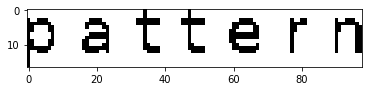

In [378]:
import cv2
import matplotlib.pyplot as plt
# Load image
haystack_img = cv2.imread("haystack.png", cv2.IMREAD_GRAYSCALE)

# Binarize image (pixels below 127 become 0, other become 255)
haystack_img = cv2.threshold(haystack_img, 127, 255, cv2.THRESH_BINARY)[-1]
test_pattern_img = haystack_img[474:491,185:283]

plt.imshow(255 - test_pattern_img, cmap='Greys')
plt.show()


---
Checking letter e


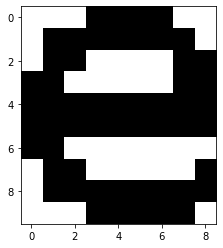

---
Checking letter a


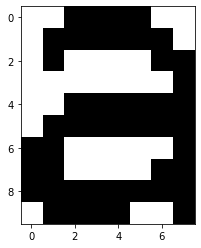

---
Checking letter w


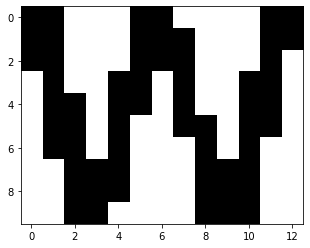

---
Checking letter q


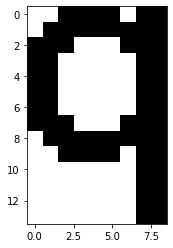

---
Checking letter p


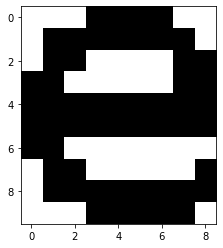

In [446]:
letters_postions = {
    'e': ((37, 47), (51, 60)),
    'a': ((103, 113), (56, 64)),
    'w': ((59, 69), (49, 62)),
    'q': ((147, 161), (191, 200)),
    'p': ((59, 69), (90, 99)),
}

# 33:48, 25:62
for letter, ((y0, y1), (x0, x1)) in list(letters_postions.items()):
    print("---")
    print(f"Checking letter {letter}")
    letter_img = haystack_img[y0:y1, x0:x1]
    plt.imshow(255 - letter_img, cmap='Greys')
    plt.show()

    # automata_img = Automata(letter_img.tolist())
    # pprint(letter_img.tolist())
    # print(len(automata_img.run2d(haystack_img.tolist())))
    # automata_text = Automata([letter])
    # print(len(automata_text.run2d(text)))